In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [106]:
df = pd.read_csv("Pakistan_COVID19.csv")
df.head()


,Province,New_Cases,Recoveries,Deaths,Vaccinations,Hospitalized,Tests_Conducted
0,Punjab,138,104,6,14226,83,7342
1,Sindh,206,188,2,15104,86,2470
2,KPK,277,234,6,16362,28,26118
3,Balochistan,371,368,4,19607,60,28117
4,Islamabad,243,225,6,9466,89,18861


In [107]:
df_encoded = pd.get_dummies(df, columns=["Province"], drop_first=False)

X = df_encoded.drop(["New_Cases"], axis=1)
y = df_encoded["New_Cases"]

print(X.shape, y.shape)


(500, 10) (500,)


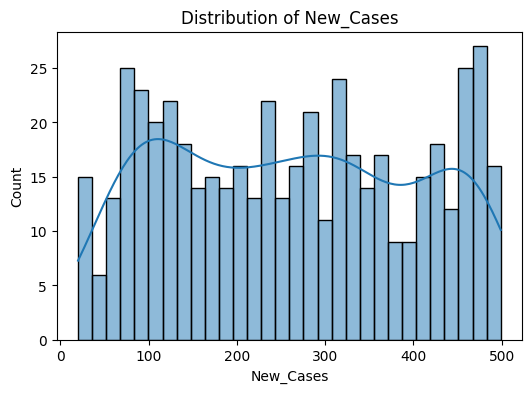

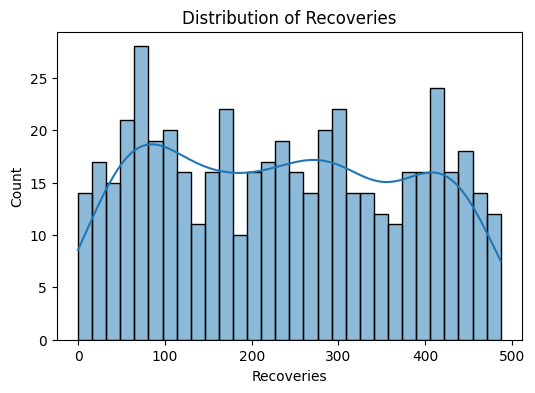

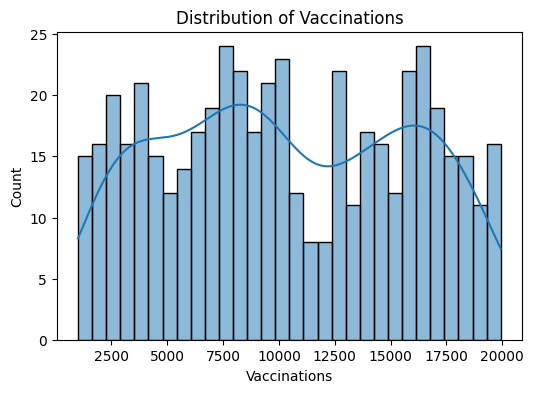

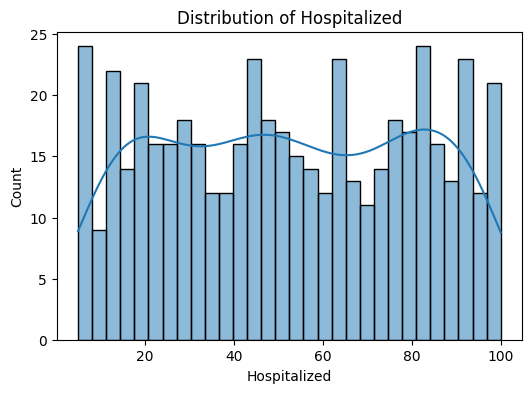

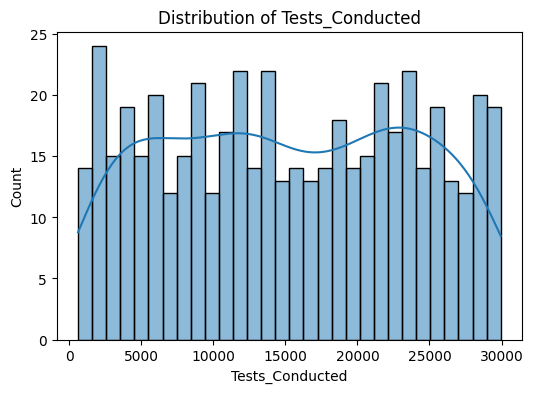

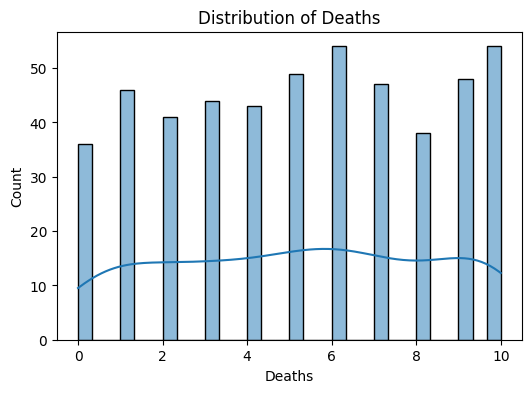

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ["New_Cases", "Recoveries", "Vaccinations", 
                "Hospitalized", "Tests_Conducted", "Deaths"]

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


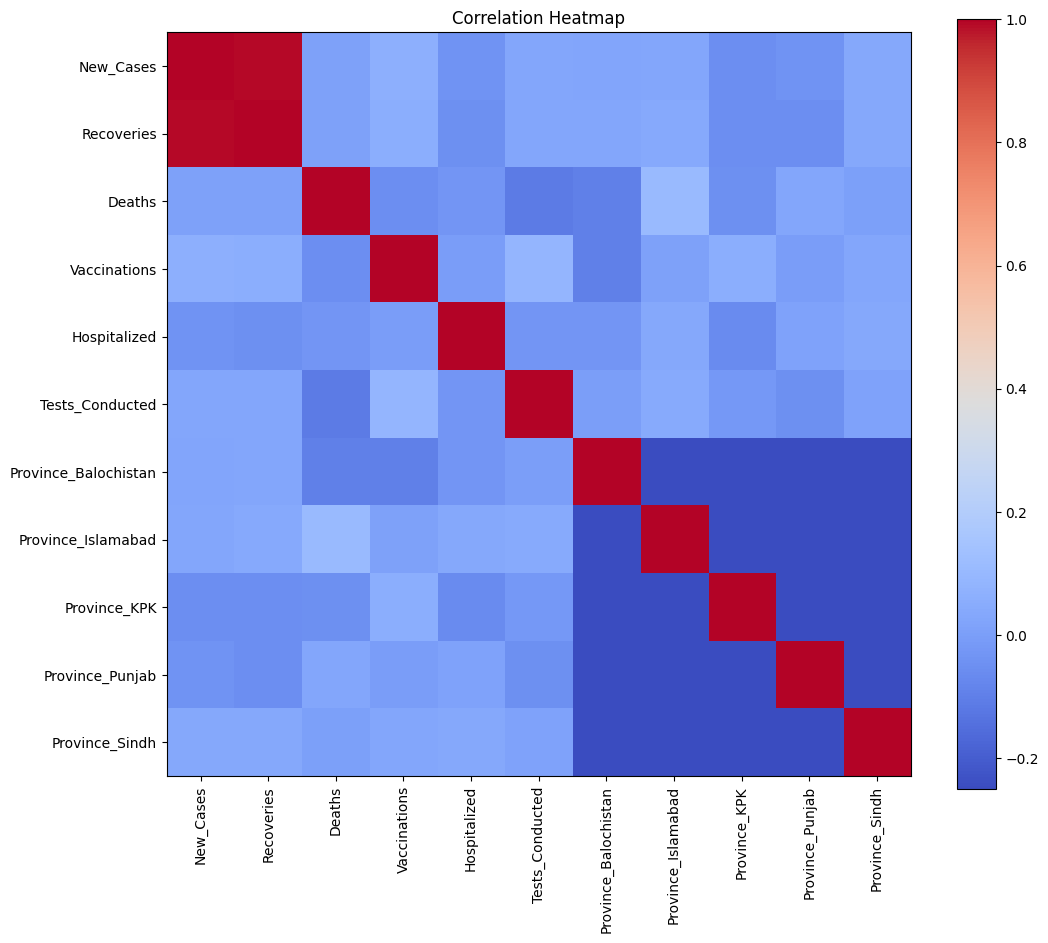

In [109]:
# ---------------------------------------------------
# 6. CORRELATION HEATMAP (MATPLOTLIB ONLY)
# ---------------------------------------------------
corr = df_encoded.corr(numeric_only=True)

plt.figure(figsize=(12,10))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()

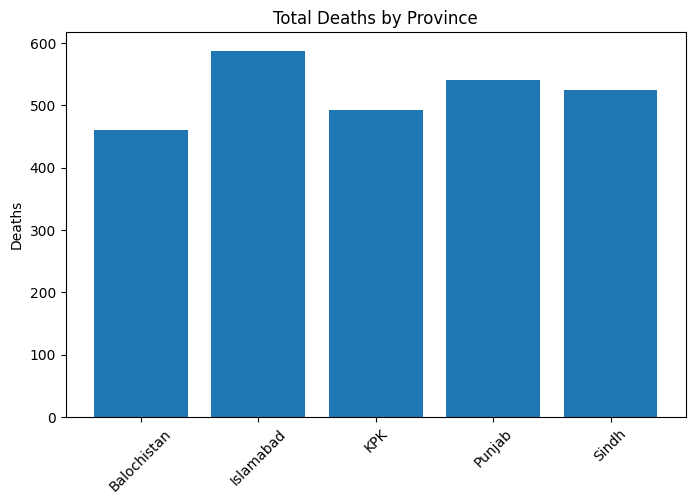

In [110]:
# ---------------------------------------------------
# 7. PROVINCE-LEVEL COMPARISONS
# ---------------------------------------------------
# Re-load original df for clean province names
grouped = df.groupby("Province")

# Total deaths by province
plt.figure(figsize=(8,5))
plt.bar(grouped["Deaths"].sum().index, grouped["Deaths"].sum().values)
plt.title("Total Deaths by Province")
plt.ylabel("Deaths")
plt.xticks(rotation=45)
plt.show()

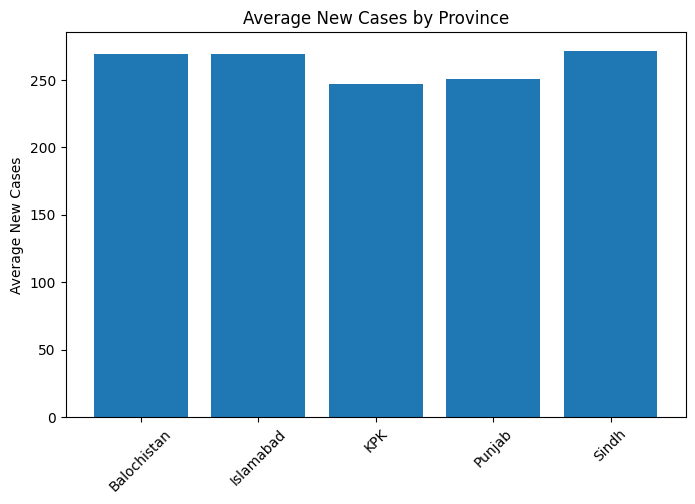

In [111]:
# Average new cases by province
plt.figure(figsize=(8,5))
plt.bar(grouped["New_Cases"].mean().index, grouped["New_Cases"].mean().values)
plt.title("Average New Cases by Province")
plt.ylabel("Average New Cases")
plt.xticks(rotation=45)
plt.show()

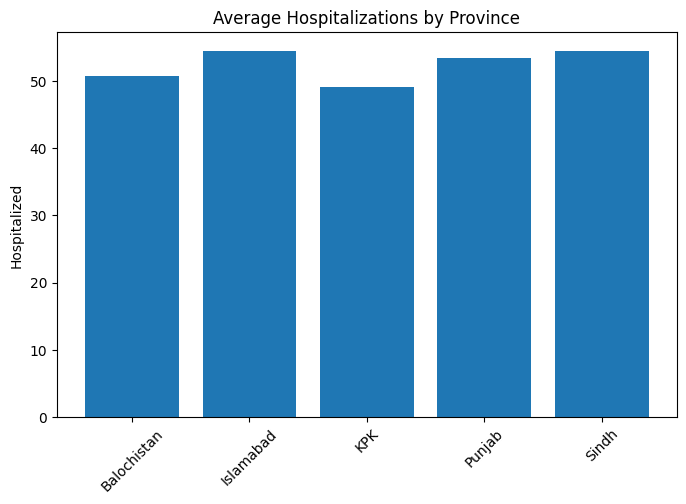

In [112]:
# Average hospitalizations by province
plt.figure(figsize=(8,5))
plt.bar(grouped["Hospitalized"].mean().index, grouped["Hospitalized"].mean().values)
plt.title("Average Hospitalizations by Province")
plt.ylabel("Hospitalized")
plt.xticks(rotation=45)
plt.show()

In [113]:
y = df_encoded["New_Cases"]   # <-- Regression target

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)


In [114]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=300, random_state=42)

In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = model.predict(X_test)

# Regression Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 0.10896666666666652
MSE: 0.02440433333333336
RMSE: 0.15621886356433837
R² Score: 0.9999674583679972


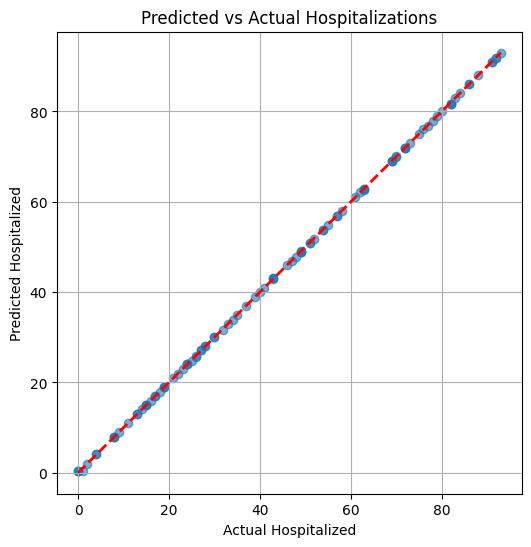

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)

# Reference 45-degree line
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'r--', linewidth=2)

plt.xlabel("Actual Hospitalized")
plt.ylabel("Predicted Hospitalized")
plt.title("Predicted vs Actual Hospitalizations")
plt.grid(True)
plt.show()


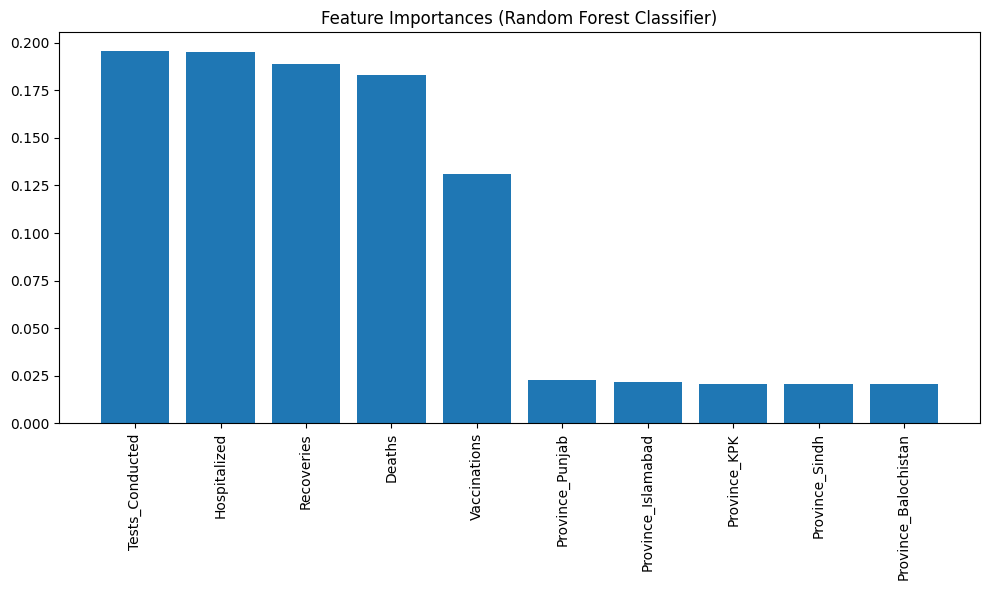

In [117]:
import matplotlib.pyplot as plt
import numpy as np

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances (Random Forest Classifier)")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()
